In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Задание 0


Для всех  заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные **tr_mcc_codes, tr_types, transactions и gender_train** из одноимённых таблиц из папки [data](https://drive.google.com/drive/folders/1YAMe7MiTxA-RSSd8Ex2p-L0Dspe6Gs4L). 

Для таблицы transactions используйте только первые n=1000000 строк. При чтении файлов обратите внимание на разделители внутри каждого из файлов - они могут различаться!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tr_mcc_codes = pd.read_csv('/content/drive/MyDrive/Data/tr_mcc_codes.csv', sep=';')
tr_types = pd.read_csv('/content/drive/MyDrive/Data/tr_types.csv', sep=';')
transactions = pd.read_csv('/content/drive/MyDrive/Data/transactions.csv', nrows=1000000, sep=',')
gender_train = pd.read_csv('/content/drive/MyDrive/Data/gender_train.csv', sep=',')

###  Описание данных
#### Таблица ```transactions.csv```
##### Описание
Таблица содержит историю транзакций клиентов банка за один год и три месяца.

##### Формат данных

```
customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
111111,15 01:40:52,1111,1000,-5224,111111
111112,15 15:18:32,3333,2000,-100,11122233
...
```
##### Описание полей

 - ```customer_id``` — идентификатор клиента;
 - ```tr_datetime``` — день и время совершения транзакции (дни нумеруются с начала данных);
 - ```mcc_code``` — mcc-код транзакции;
 - ```tr_type``` — тип транзакции;
 - ```amount``` — сумма транзакции в условных единицах со знаком; ```+``` — начисление средств клиенту (приходная транзакция), ```-``` — списание средств (расходная транзакция);
 - ```term_id``` — идентификатор терминала;


#### Таблица ```gender_train.csv```

##### Описание
Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

##### Формат данных
```
customer_id,gender
111111,0
111112,1
...
```

##### Описание полей
 - ```customer_id``` — идентификатор клиента;
 - ```gender``` — пол клиента;

### Таблица ```tr_mcc_codes.csv```

##### Описание
Данная таблица содержит описание mcc-кодов транзакций.

##### Формат данных
```
mcc_code;mcc_description
1000;словесное описание mcc-кода 1000
2000;словесное описание mcc-кода 2000
...
```

##### Описание полей
 - ```mcc_code``` – mcc-код транзакции;
 - ```mcc_description``` — описание mcc-кода транзакции.

#### Таблица ```tr_types.csv```

##### Описание
Данная таблица содержит описание типов транзакций.

##### Формат данных
```
tr_type;tr_description
1000;словесное описание типа транзакции 1000
2000;словесное описание типа транзакции 2000
...
```

##### Описание полей
 - ```tr_type``` – тип транзакции;
 - ```tr_description``` — описание типа транзакции;


Задания 1-4 делаются без использования merge!

## Задание 1



1. Для столбца tr_type датафрейма transactions выберите произвольные 1000 строк с помощью метода sample
2. В полученной на предыдущем этапе подвыборке найдите долю транзакций (стобец tr_description в датасете tr_types), в которой содержится подстрока 'POS' или 'ATM'


In [ ]:
transactions_types_sample = transactions['tr_type'].sample(n=1000)
selected_types = tr_types[tr_types['tr_description'].str.contains('POS') | tr_types['tr_description'].str.contains('ATM')]['tr_type']
matched_count = selected_types.isin(transactions_types_sample).value_counts()[True]
round(matched_count / 1000, 4)


0.007

## Задание 2 


1. Для столбца tr_type датафрейма transactions посчитайте частоту встречаемости всех типов транзакций tr_type в transactions.
2. Выведите топ-10 транзакций по частоте встречаемости (вывести для них tr_description тоже).

In [ ]:
top10_types = transactions['tr_type'].value_counts().head(10).index
tr_types[tr_types['tr_type'].isin(top10_types)]

,tr_type,tr_description
39,7010,Взнос наличных через АТМ (в своем тер.банке)
47,7030,Перевод на карту (с карты) через АТМ (в предел...
59,7070,Перевод на карту (с карты) через Мобильный бан...
60,7071,Перевод на карту (с карты) через Мобильный бан...
98,1010,Покупка. POS ТУ СБ РФ
99,1030,Оплата услуги. Банкоматы СБ РФ
100,1100,Покупка. ТУ Россия
101,1110,Покупка. POS ТУ Россия
106,2010,Выдача наличных в АТМ Сбербанк России
129,2370,Списание с карты на карту по операции <перевод...


## Задание 3
1. В датафрейме transactions найдите клиента с максимальной суммой приходов на карту
2. В датафрейме transactions найдите клиента с максимальной суммой расходов по карте
3. Найдите модуль разницы для этих клиентов между суммой расходов и суммой приходов

In [ ]:
customer_amount = transactions[['customer_id', 'amount']]
customer_amount_income = customer_amount[customer_amount['amount'] > 0]
customer_amount_outcome = customer_amount[customer_amount['amount'] < 0]

In [ ]:
income_sum_groupby_customer = customer_amount_income.groupby('customer_id').sum()
outcome_sum_groupby_customer = customer_amount_outcome.groupby('customer_id').sum()

In [ ]:
top_income_customer = income_sum_groupby_customer.idxmax().item()
top_income_amount = income_sum_groupby_customer.max().item()
top_income_customer

70780820

In [ ]:
top_outcome_customer = outcome_sum_groupby_customer.idxmin().item()
top_outcome_amount = outcome_sum_groupby_customer.min().item()
top_outcome_customer

70780820

In [ ]:
abs(top_income_amount - top_outcome_amount)

2498067091.6

## Задание 4
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций из топ 10 из задания 2
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций для клиентов из задания 3

In [ ]:
transactions_from_top10 = transactions[transactions['tr_type'].isin(top10_types)]

tr_type_mean = transactions_from_top10[['tr_type', 'amount']].groupby('tr_type').mean('amount')
tr_type_median = transactions_from_top10[['tr_type', 'amount']].groupby('tr_type').median('amount')

print('Mean:', tr_type_mean)
print('Median:', tr_type_median)

Mean:                 amount
tr_type               
1010     -19784.748640
1030      -5320.980222
1100     -44061.827262
1110     -32119.330371
2010    -136077.629325
2370    -205418.249032
7010     276391.789596
7030      86104.332909
7070      65569.831700
7071      66806.826623
Median:             amount
tr_type           
1010      -7411.52
1030      -2245.92
1100     -10188.26
1110     -11207.57
2010     -44918.32
2370     -44918.32
7010     112295.79
7030      13951.52
7070      11319.42
7071       3593.47


In [ ]:
# Клиент в 3-ем задании в обоих пунктах один и тот же.

customer_transactions = transactions[transactions['customer_id'] == top_income_customer]
customer_tr_type_amount = customer_transactions[['tr_type','amount']]

customer_tr_type_mean = customer_tr_type_amount.groupby('tr_type').mean('amount')
customer_tr_type_median = customer_tr_type_amount.groupby('tr_type').median('amount')

print('Mean:', customer_tr_type_mean)
print('Median:', customer_tr_type_median)

Mean:                amount
tr_type              
2010    -2.941056e+06
2330    -2.382398e+06
2370    -2.218505e+06
6110     1.756293e+04
7020     1.465129e+04
7021     2.850067e+04
7030     1.406196e+04
7031     1.921036e+04
7034     1.430648e+04
7040     2.153833e+04
7070     1.384821e+04
7071     1.860057e+04
7074     2.281159e+04
Median:               amount
tr_type             
2010    -3368873.660
2330    -2245915.770
2370    -2245915.770
6110       10028.010
7020       10319.985
7021       28500.670
7030        8848.910
7031       12992.620
7034       14306.480
7040       14396.320
7070        8714.150
7071       12543.440
7074        9387.930


## Подготовка для заданий 5-8

*Из заданий 5-8 нужно выполнить минимум два любых*

Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [ ]:
transactions = pd.merge(transactions, gender_train, how='left')
transactions = pd.merge(transactions, tr_mcc_codes, how='inner')
transactions = pd.merge(transactions, tr_types, how='inner')
transactions.shape

(999584, 9)

## Задание 5

1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount).
2. Определите модуль разницы между средними поступлениями у мужчин и женщин

Обратите внимание, что для вычисления модуля разности точных знаний о том, 
какой класc относится к мужчинам, а какой - к женщинам, не требуется.

In [ ]:
gender_transaction = transactions[['gender', 'amount']]
gender_transaction_outcome = gender_transaction[gender_transaction['amount'] < 0]
gender_transaction_income = gender_transaction[gender_transaction['amount'] > 0]

gender_mean_outcome = gender_transaction_outcome.groupby('gender').mean()
gender_mean_income = gender_transaction_income.groupby('gender').mean()

In [ ]:
gender_1_outcome = gender_mean_outcome[gender_mean_outcome.index == 1.0]['amount'].item()
gender_0_outcome = gender_mean_outcome[gender_mean_outcome.index == 0.0]['amount'].item()
abs(gender_1_outcome - gender_0_outcome)

32718.054920224655

In [ ]:
gender_1_income = gender_mean_income[gender_mean_outcome.index == 1.0]['amount'].item()
gender_0_income = gender_mean_income[gender_mean_outcome.index == 0.0]['amount'].item()
abs(gender_1_income - gender_0_income)

63366.57104801464

## Задание 6

1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 10 типов транзакций для мужчин и для женщин, наименьших среди всех типов транзакций по полученным значениям "max_income". 
2. Выделите среди них те типы транзакций, которые встречаются одновременно и у мужчин, и у женщин

In [ ]:
transactions_income = transactions[transactions['amount'] > 0][['gender', 'tr_type', 'amount']]

gender_1_income = transactions_income[transactions_income['gender'] == 1.0][['tr_type', 'amount']]
gender_0_income = transactions_income[transactions_income['gender'] == 0.0][['tr_type', 'amount']]

gender_1_type_max_income = gender_1_income.groupby('tr_type').max('amount').sort_values(by='amount').head(10)
gender_0_type_max_income = gender_0_income.groupby('tr_type').max('amount').sort_values(by='amount').head(10)

print('Gender 1:', gender_1_type_max_income)
print('Gender 0:', gender_0_type_max_income)

Gender 1:             amount
tr_type           
4110       2245.92
2020       2245.92
1010      28803.87
8100      64682.37
6000      79280.83
7041      87590.72
2010      89836.63
2110     112295.79
2370     113194.15
7015     121279.45
Gender 0:            amount
tr_type          
4051      1122.96
4110      2245.92
4210      2245.92
2370      2335.75
4100      5041.86
7075      6737.75
2110     22459.16
1010     24839.83
2010     44918.32
2210     68315.82


In [ ]:
intersect_types = gender_1_type_max_income[gender_1_type_max_income.index.isin(gender_0_type_max_income.index)].index
intersect_types

Int64Index([4110, 1010, 2010, 2110, 2370], dtype='int64', name='tr_type')

## Задание 7

1. Найдите суммы затрат по каждой категории (mcc) для мужчин и для женщин. 
2. Найдите топ 10 категорий с самыми большими относительными модулями разности в тратах для разных полов (в ответе должны присутствовать описания mcc кодов).

In [ ]:
gender_mcc_amount_outcome = transactions[transactions['amount'] < 0][['gender', 'mcc_code', 'amount']]

gender_1_mcc_amount = gender_mcc_amount_outcome[gender_mcc_amount_outcome['gender'] == 1.0][['mcc_code', 'amount']]
gender_0_mcc_amount = gender_mcc_amount_outcome[gender_mcc_amount_outcome['gender'] == 0.0][['mcc_code', 'amount']]

gender_1_mcc_sum = gender_1_mcc_amount.groupby('mcc_code').sum().apply(abs)
print('Gender 1:', gender_1_mcc_sum)

gender_0_mcc_sum = gender_0_mcc_amount.groupby('mcc_code').sum().apply(abs)
print('Gender 0:', gender_0_mcc_sum)

Gender 1:                amount
mcc_code             
742         132277.93
1711        206264.90
1731        121542.67
1799       1129257.68
2741        221290.08
...               ...
8999      28643346.63
9222        988205.17
9311        373271.22
9399       1810820.67
9402          4581.67

[175 rows x 1 columns]
Gender 0:                amount
mcc_code             
742         386207.68
1711        674897.69
1799        261626.73
2741         20746.42
3000      74431645.27
...               ...
8699        521107.48
8999      19432057.92
9222        361143.24
9311        406197.45
9399       1481389.65

[174 rows x 1 columns]


In [ ]:
top10_mcc_amount = abs(gender_1_mcc_sum - gender_0_mcc_sum).sort_values(by='amount', ascending=False).head(10)
tr_mcc_codes[tr_mcc_codes['mcc_code'].isin(top10_mcc_amount.index)]

,mcc_code,mcc_description
22,4829,Денежные переводы
62,5511,"Легковой и грузовой транспорт — продажа, серви..."
64,5533,Автозапчасти и аксессуары
65,5541,Станции техобслуживания
75,5661,Обувные магазины
90,5812,"Места общественного питания, рестораны"
116,5977,Магазины косметики
123,6010,Финансовые институты — снятие наличности вручную
124,6011,Финансовые институты — снятие наличности автом...
162,7995,Транзакции по азартным играм


## Задание 8

1. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
2. Посчитайте количество транзакций с amount<0 в ночное время для мужчин и женщин. Ночное время - это примерно 00-06 часов. 

In [ ]:
hours = transactions['tr_datetime'].str.split().apply(lambda x: int(x[1].split(':')[0]))
night_hours = hours[(hours > 0) & (hours < 6)]

In [ ]:
night_outcomes = transactions[transactions.index.isin(night_hours.index) & (transactions['amount'] < 0)].value_counts('gender')
night_outcomes

gender
0.0    9767
1.0    7320
dtype: int64

## Задание на защиту

В задании 6 нашли пять типов транзакций. Для каждого из этих типов постройте один график, на котором для 24 часов покажите количество транзакций каждого типа.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


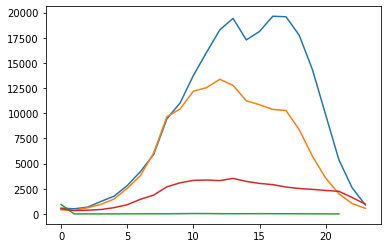

In [123]:
intersect_transactions = transactions[transactions['tr_type'].isin(intersect_types)]
intersect_transactions['tr_datetime'] = intersect_transactions['tr_datetime'].str.split().apply(lambda x: int(x[1].split(':')[0]))
transaction_count = intersect_transactions.value_counts(['tr_type', 'tr_datetime']).reset_index().sort_values(by=['tr_datetime'])
for i in range(1, len(intersect_types.values)):
  plt.plot(transaction_count.reset_index()[transaction_count.reset_index()['tr_type'] == intersect_types[i]][0].values)
  
plt.show()